In [78]:
import os
import tarfile

from holoviews.plotting.bokeh.styles import alpha
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [79]:
fetch_housing_data()

/var/folders/ft/pkyxbgxd5qqcsz8hx6b9xk480000gn/T/ipykernel_72144/2974537054.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [80]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [81]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [82]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [84]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


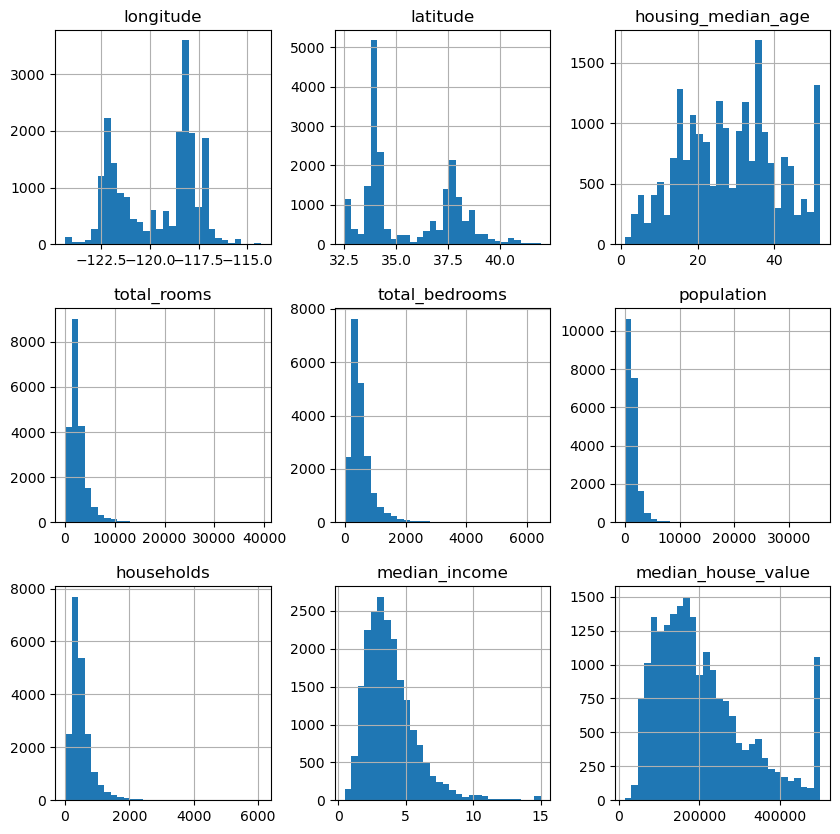

In [85]:
import matplotlib.pyplot as plt
housing.hist(bins=30, figsize=(10, 10))
plt.show()

### Создание испытатеnьного набора

In [86]:
import numpy as np
def split_train_test(data, test_ratio=0.2):
    shuffled_data = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    
    training_set = data.iloc[shuffled_data[:test_size]]
    test_set = data.iloc[shuffled_data[test_size:]]
    
    return training_set, test_set

In [87]:
training_set, test_set = split_train_test(housing)

In [88]:
print(f'Training set size: {len(training_set)}\nTesting set size: {len(test_set)}\nFull size: {len(housing)}')

Training set size: 4128
Testing set size: 16512
Full size: 20640


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [91]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing[['median_income', 'income_cat']]

,median_income,income_cat
0,8.3252,6.0
1,8.3014,6.0
2,7.2574,5.0
3,5.6431,4.0
4,3.8462,3.0
...,...,...
20635,1.5603,2.0
20636,2.5568,2.0
20637,1.7000,2.0
20638,1.8672,2.0


In [92]:
housing['income_cat'] = housing['income_cat'].where(housing['income_cat'] < 5, 5.0)
housing['income_cat'].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

In [93]:
housing[['median_income', 'income_cat']]

,median_income,income_cat
0,8.3252,5.0
1,8.3014,5.0
2,7.2574,5.0
3,5.6431,4.0
4,3.8462,3.0
...,...,...
20635,1.5603,2.0
20636,2.5568,2.0
20637,1.7000,2.0
20638,1.8672,2.0


In [94]:
from sklearn.model_selection import StratifiedShuffleSplit

In [95]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [96]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [97]:
housing['income_cat'].value_counts()/len(housing)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

<Axes: >

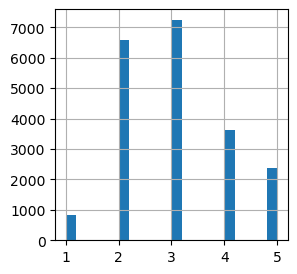

In [102]:
housing['income_cat'].hist(bins=20, figsize=(3, 3))

In [104]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace=True)

### Обнаружение и визуализация данных для понимания их сущности

In [105]:
housing = strat_train_set.copy()

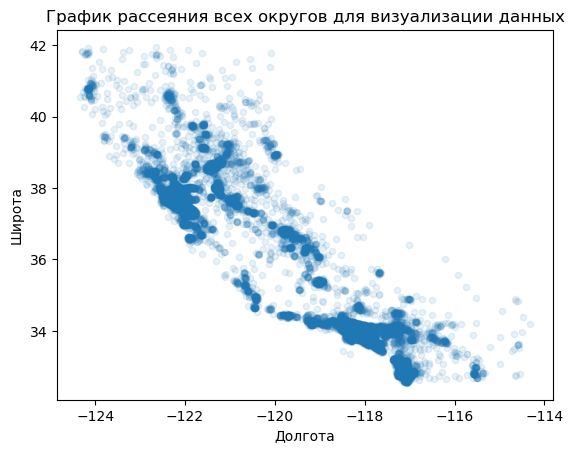

In [117]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('График рассеяния всех округов для визуализации данных')
plt.show()

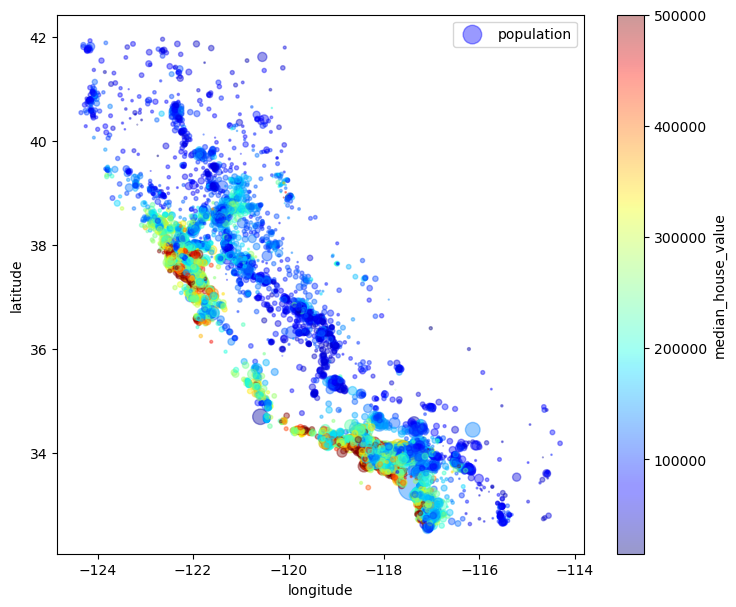

In [135]:
housing.plot(kind = 'scatter', 
             x = 'longitude',
             y = 'latitude',
             alpha = 0.4,
             
             s = housing['population']/100,
             label = 'population',
             
             figsize = (8.5, 7),
             c = 'median_house_value',
             cmap = plt.get_cmap('jet'),
             colorbar = True,
             )
plt.legend()
plt.show()

### Поиск связей